In [2]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [3]:
## Protein of interest is Beta-Secretase, a protein associated with ALzeihemers's Disease
target_protein = new_client.target
target_query = target_protein.search('Beta-Secretase').filter(target_type='SINGLE PROTEIN').filter(organism='Homo sapiens')
data = pd.DataFrame.from_dict(target_query)
data

cross_references      organism  \
0    [{'xref_id': 'Q9Y5Z0', 'xref_name': None, 'xre...  Homo sapiens   
1    [{'xref_id': 'Beta-secretase_1', 'xref_name': ...  Homo sapiens   
2    [{'xref_id': 'P05067', 'xref_name': None, 'xre...  Homo sapiens   
3                                                   []  Homo sapiens   
4    [{'xref_id': 'Q9NZ42', 'xref_name': None, 'xre...  Homo sapiens   
..                                                 ...           ...   
269                                                 []  Homo sapiens   
270                                                 []  Homo sapiens   
271                                                 []  Homo sapiens   
272                                                 []  Homo sapiens   
273                                                 []  Homo sapiens   

                              pref_name  score  species_group_flag  \
0                      Beta secretase 2   18.0               False   
1                      Beta-secretase 1   18.0               False   
2               Beta amyloid A4 protein   15.0               False   
3    Gamma-secretase-activating protein   14.0               False   
4         Gamma-secretase subunit PEN-2   12.0               False   
..                                  ...    ...                 ...   
269    Growth/differentiation factor 15    2.0               False   
270       Stromal cell-derived factor 1    2.0               False   
271                          Prosaposin    2.0               False   
272             Melanocyte protein PMEL    2.0               False   
273                           Filamin-B    2.0               False   

    target_chembl_id                                  target_components  \
0         CHEMBL2525  [{'accession': 'Q9Y5Z0', 'component_descriptio...   
1         CHEMBL4822  [{'accession': 'P56817', 'component_descriptio...   
2         CHEMBL2487  [{'accession': 'P05067', 'component_descriptio...   
3      CHEMBL3638343  [{'accession': 'A4D1B5', 'component_descriptio...   
4         CHEMBL2374  [{'accession': 'Q9NZ42', 'component_descriptio...   
..               ...                                                ...   
269    CHEMBL3120039  [{'accession': 'Q99988', 'component_descriptio...   
270    CHEMBL3286074  [{'accession': 'P48061', 'component_descriptio...   
271    CHEMBL3580523  [{'accession': 'P07602', 'component_descriptio...   
272    CHEMBL3712988  [{'accession': 'P40967', 'component_descriptio...   
273    CHEMBL4295677  [{'accession': 'O75369', 'component_descriptio...   

        target_type  tax_id  
0    SINGLE PROTEIN    9606  
1    SINGLE PROTEIN    9606  
2    SINGLE PROTEIN    9606  
3    SINGLE PROTEIN    9606  
4    SINGLE PROTEIN    9606  
..              ...     ...  
269  SINGLE PROTEIN    9606  
270  SINGLE PROTEIN    9606  
271  SINGLE PROTEIN    9606  
272  SINGLE PROTEIN    9606  
273  SINGLE PROTEIN    9606  

[274 rows x 9 columns]

In [4]:
## we want only the first protein: Beta secratese 1 
chosen_one = data.iloc[1]['target_chembl_id']

In [5]:
target_activity = new_client.activity
target_query = target_activity.filter(target_chembl_id=chosen_one).filter(standard_type='IC50')

In [6]:
df = pd.DataFrame.from_dict(target_query)

In [7]:
df ## constains all of the compunds that have been tested in this protein. 

activity_comment  activity_id activity_properties assay_chembl_id  \
0                None        78857                  []    CHEMBL653511   
1                None       391560                  []    CHEMBL653332   
2                None       391983                  []    CHEMBL653512   
3                None       395858                  []    CHEMBL653512   
4                None       395859                  []    CHEMBL653512   
...               ...          ...                 ...             ...   
9811             None     18771806                  []   CHEMBL4268509   
9812             None     18771807                  []   CHEMBL4268509   
9813             None     18771808                  []   CHEMBL4268509   
9814             None     18771809                  []   CHEMBL4268509   
9815             None     18796525                  []   CHEMBL4273887   

                                      assay_description assay_type  \
0     Inhibitory activity against Beta-secretase 1 w...          B   
1     Compound was tested for its inhibitory activit...          B   
2                  Inhibition of human Beta-secretase 1          B   
3                  Inhibition of human Beta-secretase 1          B   
4                  Inhibition of human Beta-secretase 1          B   
...                                                 ...        ...   
9811  Inhibition of human BACE1 using rhodamine-EVNL...          B   
9812  Inhibition of human BACE1 using rhodamine-EVNL...          B   
9813  Inhibition of human BACE1 using rhodamine-EVNL...          B   
9814  Inhibition of human BACE1 using rhodamine-EVNL...          B   
9815  Inhibition of human BACE-1 after 30 mins by FR...          B   

     bao_endpoint   bao_format              bao_label  \
0     BAO_0000190  BAO_0000357  single protein format   
1     BAO_0000190  BAO_0000357  single protein format   
2     BAO_0000190  BAO_0000357  single protein format   
3     BAO_0000190  BAO_0000357  single protein format   
4     BAO_0000190  BAO_0000357  single protein format   
...           ...          ...                    ...   
9811  BAO_0000190  BAO_0000357  single protein format   
9812  BAO_0000190  BAO_0000357  single protein format   
9813  BAO_0000190  BAO_0000357  single protein format   
9814  BAO_0000190  BAO_0000357  single protein format   
9815  BAO_0000190  BAO_0000357  single protein format   

                                       canonical_smiles  ... target_organism  \
0     CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...  ...    Homo sapiens   
1     CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...  ...    Homo sapiens   
2     CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...  ...    Homo sapiens   
3     CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...  ...    Homo sapiens   
4     CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...  ...    Homo sapiens   
...                                                 ...  ...             ...   
9811  Cc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)OCCN(C)C)c...  ...    Homo sapiens   
9812  CN(C)CCOC(=O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=...  ...    Homo sapiens   
9813  Cc1ccc(NC(=O)c2coc3ccc(/C=C/C(=O)OCCN(C)C)cc3c...  ...    Homo sapiens   
9814      O=C(O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=O)c2c1  ...    Homo sapiens   
9815  O=C(O)c1cc(-c2ccc(/C=N/Nc3nc(Nc4ccc(F)cc4)nc(N...  ...    Homo sapiens   

      target_pref_name target_tax_id text_value  toid  type units    uo_units  \
0     Beta-secretase 1          9606       None  None  IC50    nM  UO_0000065   
1     Beta-secretase 1          9606       None  None  IC50    uM  UO_0000065   
2     Beta-secretase 1          9606       None  None  IC50    uM  UO_0000065   
3     Beta-secretase 1          9606       None  None  IC50    uM  UO_0000065   
4     Beta-secretase 1          9606       None  None  IC50    uM  UO_0000065   
...                ...           ...        ...   ...   ...   ...         ...   
9811  Beta-secretase 1          9606       None  None  IC50   

In [8]:
## Dropping all the null values. (lost 108 observations)
df.dropna(subset=['standard_value'],inplace=True)

In [31]:
## Saving to csv 
df.to_csv('Beta-secretase-1.csv', index=False)

In [10]:
data = pd.read_csv('Beta-secretase-1.csv')

In [11]:
data.shape

(9708, 43)

In [12]:
## Changing the standard values to class type for classification type model. 
bioactivity_class =[]
for x in data.standard_value:
    if float(x) >= 10000:
        bioactivity_class.append('inactive')
    elif float(x) < 1000:
        bioactivity_class.append('active')
    else:
        bioactivity_class.append('min effect')

In [13]:
from collections import Counter
Counter(bioactivity_class)

Counter({'active': 6410, 'min effect': 1922, 'inactive': 1376})

In [14]:
## There is imbalance in the set of active and inactive compunds. 
## Now, we make a dataframe containing only the chembl_id, standard_value, canonical smile, and bioactivity class.
data['bioactivity_class'] = bioactivity_class
data2 = data[['bioactivity_class', 'molecule_chembl_id', 'canonical_smiles', 'standard_value']]
data2.reset_index(inplace=True)

In [15]:
data2

index bioactivity_class molecule_chembl_id  \
0         0            active       CHEMBL406146   
1         1            active        CHEMBL78946   
2         2            active       CHEMBL324109   
3         3        min effect       CHEMBL114147   
4         4        min effect       CHEMBL419949   
...     ...               ...                ...   
9703   9703          inactive      CHEMBL4292235   
9704   9704          inactive      CHEMBL4286556   
9705   9705          inactive      CHEMBL4284235   
9706   9706          inactive      CHEMBL4284580   
9707   9707        min effect      CHEMBL1164540   

                                       canonical_smiles  standard_value  
0     CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...           413.0  
1     CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...             2.0  
2     CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...           460.0  
3     CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...          9000.0  
4     CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...          5600.0  
...                                                 ...             ...  
9703  Cc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)OCCN(C)C)c...         10000.0  
9704  CN(C)CCOC(=O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=...         10000.0  
9705  Cc1ccc(NC(=O)c2coc3ccc(/C=C/C(=O)OCCN(C)C)cc3c...         10000.0  
9706      O=C(O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=O)c2c1         10000.0  
9707  O=C(O)c1cc(-c2ccc(/C=N/Nc3nc(Nc4ccc(F)cc4)nc(N...          7000.0  

[9708 rows x 5 columns]

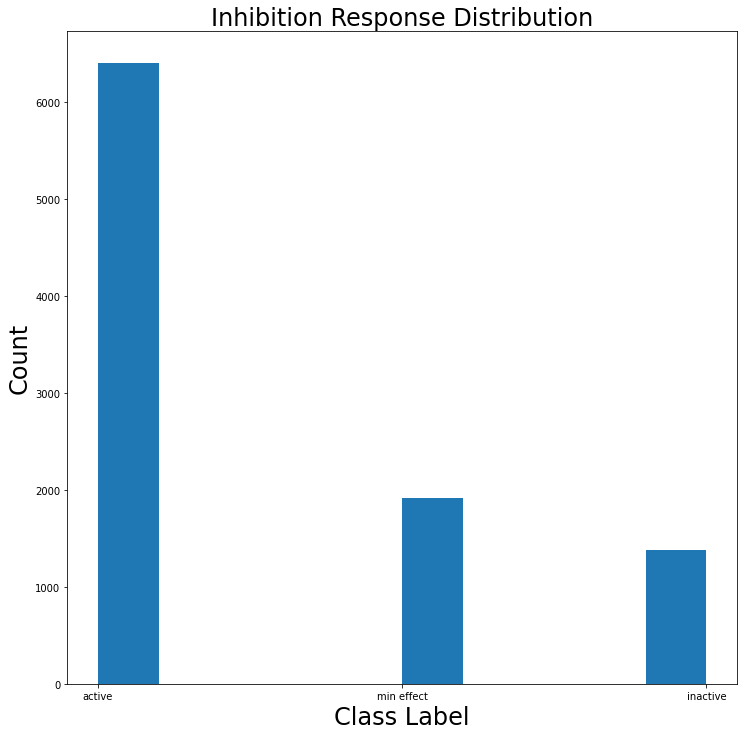

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.hist(data2['bioactivity_class'])
plt.xlabel('Class Label', fontsize=24)
plt.ylabel('Count', fontsize=24)
plt.title('Inhibition Response Distribution', fontsize=24)
plt.savefig('Inhibition Response Distribution.png')

## EDA using Lipinski Descriptors 

In [17]:
from rdkit import Chem
from rdkit.Chem import Lipinski, Descriptors
import numpy as np

In [18]:
## calculate the Lipinski descriptors of the compunds: Molecular Weight, Hydrogen bond donors, Hydrogen bond acceptors, and 
## octanol-water partition coefficent. 
def mol_descriptors(molecules, verbose=False):
    
    molData = []
    for x in molecules:
        mol = Chem.MolFromSmiles(x)
        molData.append(mol)
        
    storage = np.arange(1,1)
    i=0
    
    for y in molData:
        MolWt = Descriptors.MolWt(y)
        NumHDonors = Descriptors.NumHDonors(y)
        NumHAccept = Descriptors.NumHAcceptors(y)
        MolLogP = Descriptors.MolLogP(y)
        
        insert = np.array([MolWt, NumHDonors, NumHAccept, MolLogP])
        
        if (i==0):
            LipinskiData = insert
        else:
            LipinskiData = np.vstack([LipinskiData, insert])
        i=+1
        
    column_names = ['Molecular Weight', 'Number of Hydrogen Donors', 'Number of Hydrogen Acceptors', 'OWPC']
    Lipinski_descriptors = pd.DataFrame(LipinskiData,columns=column_names)
    
    return Lipinski_descriptors

In [19]:
df_lipinski = mol_descriptors(data2.canonical_smiles)

In [20]:
df_lipinski

Molecular Weight  Number of Hydrogen Donors  \
0              999.085                       13.0   
1              893.005                       12.0   
2              751.988                        8.0   
3              737.895                        8.0   
4              828.020                        8.0   
...                ...                        ...   
9703           420.465                        1.0   
9704           406.438                        1.0   
9705           420.465                        1.0   
9706           335.315                        2.0   
9707           537.939                        3.0   

      Number of Hydrogen Acceptors     OWPC  
0                             13.0 -1.43550  
1                             12.0 -1.73610  
2                              9.0  2.35350  
3                              8.0  1.96260  
4                              8.0  3.57390  
...                            ...      ...  
9703                           6.0  3.47172  
9704                           6.0  3.16330  
9705                           6.0  3.47172  
9706                           4.0  3.14310  
9707                          10.0  4.64850  

[9708 rows x 4 columns]

In [32]:
df_lipinski.to_csv('df-lipinski.csv', index=False)

In [26]:
df_full = pd.concat([data2, df_lipinski], axis=1)

In [29]:
df_full.drop(columns=['index'], inplace=True)

In [30]:
df_full.to_csv('Lipinksi - complete dataset', index=False)

In [33]:
df_full

bioactivity_class molecule_chembl_id  \
0               active       CHEMBL406146   
1               active        CHEMBL78946   
2               active       CHEMBL324109   
3           min effect       CHEMBL114147   
4           min effect       CHEMBL419949   
...                ...                ...   
9703          inactive      CHEMBL4292235   
9704          inactive      CHEMBL4286556   
9705          inactive      CHEMBL4284235   
9706          inactive      CHEMBL4284580   
9707        min effect      CHEMBL1164540   

                                       canonical_smiles  standard_value  \
0     CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...           413.0   
1     CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...             2.0   
2     CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...           460.0   
3     CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...          9000.0   
4     CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...          5600.0   
...                                                 ...             ...   
9703  Cc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)OCCN(C)C)c...         10000.0   
9704  CN(C)CCOC(=O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=...         10000.0   
9705  Cc1ccc(NC(=O)c2coc3ccc(/C=C/C(=O)OCCN(C)C)cc3c...         10000.0   
9706      O=C(O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=O)c2c1         10000.0   
9707  O=C(O)c1cc(-c2ccc(/C=N/Nc3nc(Nc4ccc(F)cc4)nc(N...          7000.0   

      Molecular Weight  Number of Hydrogen Donors  \
0              999.085                       13.0   
1              893.005                       12.0   
2              751.988                        8.0   
3              737.895                        8.0   
4              828.020                        8.0   
...                ...                        ...   
9703           420.465                        1.0   
9704           406.438                        1.0   
9705           420.465                        1.0   
9706           335.315                        2.0   
9707           537.939                        3.0   

      Number of Hydrogen Acceptors     OWPC  
0                             13.0 -1.43550  
1                             12.0 -1.73610  
2                              9.0  2.35350  
3                              8.0  1.96260  
4                              8.0  3.57390  
...                            ...      ...  
9703                           6.0  3.47172  
9704                           6.0  3.16330  
9705                           6.0  3.47172  
9706                           4.0  3.14310  
9707                          10.0  4.64850  

[9708 rows x 8 columns]

<AxesSubplot:>

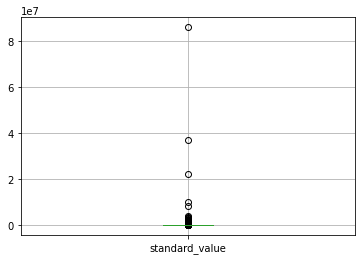

In [41]:
df_full.boxplot(column=['standard_value'])

#### We see the standard value (response variable) is highly skewed to the right, with many outliers. 
#### To improve our model's ability to predict standard values, we will convert the IC50 values to pIC50 using the formula:
#### -log(IC50 * 10^-9)

In [6]:
import pandas as pd
df_full = pd.read_csv('Lipinski- complete dataset.csv')

In [7]:
df_full

bioactivity_class molecule_chembl_id  \
0               active       CHEMBL406146   
1               active        CHEMBL78946   
2               active       CHEMBL324109   
3           min effect       CHEMBL114147   
4           min effect       CHEMBL419949   
...                ...                ...   
9703          inactive      CHEMBL4292235   
9704          inactive      CHEMBL4286556   
9705          inactive      CHEMBL4284235   
9706          inactive      CHEMBL4284580   
9707        min effect      CHEMBL1164540   

                                       canonical_smiles  standard_value  \
0     CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...           413.0   
1     CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...             2.0   
2     CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...           460.0   
3     CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...          9000.0   
4     CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...          5600.0   
...                                                 ...             ...   
9703  Cc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)OCCN(C)C)c...         10000.0   
9704  CN(C)CCOC(=O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=...         10000.0   
9705  Cc1ccc(NC(=O)c2coc3ccc(/C=C/C(=O)OCCN(C)C)cc3c...         10000.0   
9706      O=C(O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=O)c2c1         10000.0   
9707  O=C(O)c1cc(-c2ccc(/C=N/Nc3nc(Nc4ccc(F)cc4)nc(N...          7000.0   

      Molecular Weight  Number of Hydrogen Donors  \
0              999.085                       13.0   
1              893.005                       12.0   
2              751.988                        8.0   
3              737.895                        8.0   
4              828.020                        8.0   
...                ...                        ...   
9703           420.465                        1.0   
9704           406.438                        1.0   
9705           420.465                        1.0   
9706           335.315                        2.0   
9707           537.939                        3.0   

      Number of Hydrogen Acceptors     OWPC  
0                             13.0 -1.43550  
1                             12.0 -1.73610  
2                              9.0  2.35350  
3                              8.0  1.96260  
4                              8.0  3.57390  
...                            ...      ...  
9703                           6.0  3.47172  
9704                           6.0  3.16330  
9705                           6.0  3.47172  
9706                           4.0  3.14310  
9707                          10.0  4.64850  

[9708 rows x 8 columns]

In [33]:
df_full['standard_value'].describe()

count    9.708000e+03
mean     3.465020e+04
std      9.917863e+05
min      2.000000e-04
25%      2.800000e+01
50%      2.100000e+02
75%      2.250000e+03
max      8.600000e+07
Name: standard_value, dtype: float64

In [ ]:
## Setting a cutoff to the standad value will help with interpreting test results. Large IC50 values are already poor 
## candidates for clinical trials, so capping pIC50 values at 10000000 will our data more uniform without sacrificing 
## the validity of our conclusions. 

In [4]:
def standardize_and_conversion(dataset):
    store = []
    for x in dataset['standard_value']:
        ### Setting IC50 value cutoff at 10000000
        if x > 10000000:
            x = 10000000
        
        #### Converting IC50 value to molar values 
        molar_value = x*(10**-9)
        insert = -math.log(molar_value,10)
        store.append(insert)
    return store

In [47]:
Standard_value_norm = standardize(df_full.standard_value)

In [48]:
Standard_value_norm = pd.Series(Standard_value_norm)
Standard_value_norm.describe()

count    9.708000e+03
mean     2.280430e+04
std      2.498172e+05
min      2.000000e-04
25%      2.800000e+01
50%      2.100000e+02
75%      2.250000e+03
max      1.000000e+07
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1f8f87cf240>,
 'caps': [<matplotlib.lines.Line2D at 0x1f8f87cf7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f8f87c2f98>],
 'medians': [<matplotlib.lines.Line2D at 0x1f8f87cfda0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f8f87da0b8>],
 'means': []}

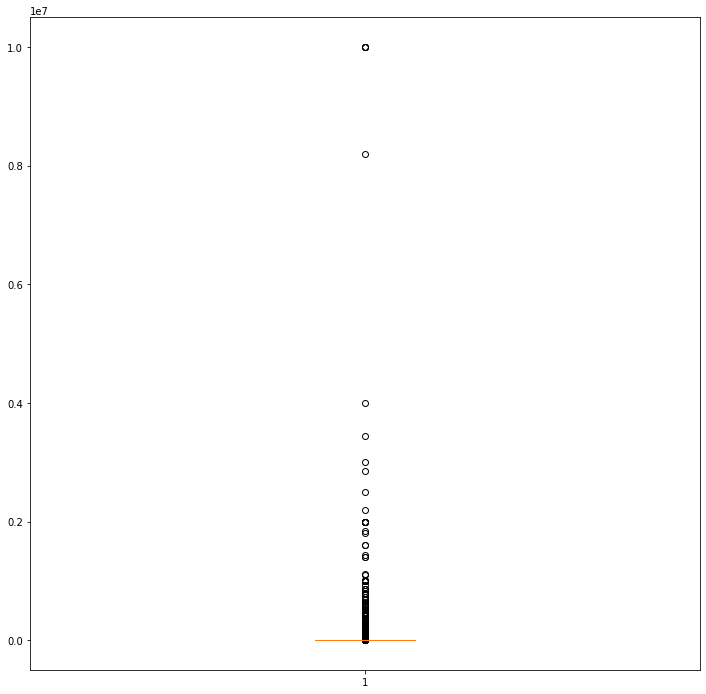

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.boxplot(Standard_value_norm)

In [51]:
pIC50 = conversion(Standard_value_norm)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f8f8825860>,
 'caps': [<matplotlib.lines.Line2D at 0x1f8f8825e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f8f88255f8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f8f8839400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f8f88396d8>],
 'means': []}

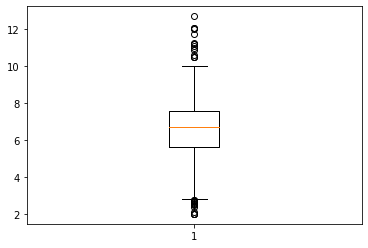

In [52]:
plt.boxplot(pIC50)

In [35]:
import pandas as pd
df_full = pd.read_csv('Lipinski- complete dataset.csv')

In [36]:
df_full

bioactivity_class molecule_chembl_id  \
0               active       CHEMBL406146   
1               active        CHEMBL78946   
2               active       CHEMBL324109   
3           min effect       CHEMBL114147   
4           min effect       CHEMBL419949   
...                ...                ...   
9703          inactive      CHEMBL4292235   
9704          inactive      CHEMBL4286556   
9705          inactive      CHEMBL4284235   
9706          inactive      CHEMBL4284580   
9707        min effect      CHEMBL1164540   

                                       canonical_smiles  standard_value  \
0     CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...           413.0   
1     CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...             2.0   
2     CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...           460.0   
3     CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...          9000.0   
4     CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...          5600.0   
...                                                 ...             ...   
9703  Cc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)OCCN(C)C)c...         10000.0   
9704  CN(C)CCOC(=O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=...         10000.0   
9705  Cc1ccc(NC(=O)c2coc3ccc(/C=C/C(=O)OCCN(C)C)cc3c...         10000.0   
9706      O=C(O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=O)c2c1         10000.0   
9707  O=C(O)c1cc(-c2ccc(/C=N/Nc3nc(Nc4ccc(F)cc4)nc(N...          7000.0   

      Molecular Weight  Number of Hydrogen Donors  \
0              999.085                       13.0   
1              893.005                       12.0   
2              751.988                        8.0   
3              737.895                        8.0   
4              828.020                        8.0   
...                ...                        ...   
9703           420.465                        1.0   
9704           406.438                        1.0   
9705           420.465                        1.0   
9706           335.315                        2.0   
9707           537.939                        3.0   

      Number of Hydrogen Acceptors     OWPC  
0                             13.0 -1.43550  
1                             12.0 -1.73610  
2                              9.0  2.35350  
3                              8.0  1.96260  
4                              8.0  3.57390  
...                            ...      ...  
9703                           6.0  3.47172  
9704                           6.0  3.16330  
9705                           6.0  3.47172  
9706                           4.0  3.14310  
9707                          10.0  4.64850  

[9708 rows x 8 columns]

In [293]:
import math 
def standardize_and_conversion_1(dataset):
    store = []
    for x in dataset['standard_value']:
        ### Setting IC50 value cutoff at 10000000
        if x > 1000000:
            x = 1000000
        
        #### Converting IC50 value to molar values 
        molar_value = x*(10**-9)
        insert = -math.log(molar_value,10)
        store.append(insert)
    return store

In [294]:
setting = standardize_and_conversion_1(df_full)

{'whiskers': [<matplotlib.lines.Line2D at 0x24328bfdaf0>,
 'caps': [<matplotlib.lines.Line2D at 0x243285a28e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24328bfd670>],
 'medians': [<matplotlib.lines.Line2D at 0x243289c73a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x243289c7b20>],
 'means': []}

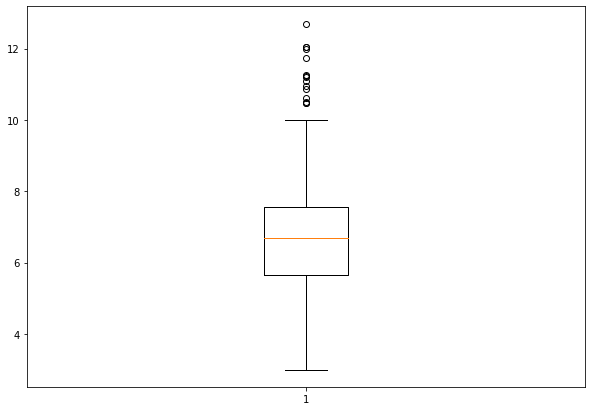

In [295]:
## plot shoing the effect of the molar value conversion on sample space. 
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(10,7))
plt.boxplot(setting)
#plt.savefig('pIC50 values(log1000)')

In [296]:
setting = pd.Series(setting)
setting.describe()

count    9708.000000
mean        6.558409
std         1.320022
min         3.000000
25%         5.647817
50%         6.677781
75%         7.552842
max        12.698970
dtype: float64

In [298]:
q3 = setting.quantile(0.75)
q1 = setting.quantile(0.25)
iqr = 1.5*(q3 -q1) + q3
setting.loc[setting > iqr]

4300    10.508638
8327    10.958607
8328    11.086186
8329    11.214670
8330    11.244125
8331    12.045757
8332    12.698970
8333    12.045757
8334    11.744727
8335    12.000000
9270    10.619789
9271    11.221849
9466    10.481486
9479    10.853872
9480    10.468521
dtype: float64

In [ ]:
## Since subset of outliers is small(15), removal of these values will be the best course of action as supposed to fitting 
## them into the model. 

In [303]:
insert_2 = setting[setting <= iqr]
df_full['pIC50'] = insert_2

In [311]:
df_full.pIC50.isnull().count()

9708

In [312]:
insert_2.count()

9693

In [319]:
df_full.insert(8, 'pIC50', insert_2)

In [320]:
df_full

bioactivity_class molecule_chembl_id  \
0               active       CHEMBL406146   
1               active        CHEMBL78946   
2               active       CHEMBL324109   
3           min effect       CHEMBL114147   
4           min effect       CHEMBL419949   
...                ...                ...   
9703          inactive      CHEMBL4292235   
9704          inactive      CHEMBL4286556   
9705          inactive      CHEMBL4284235   
9706          inactive      CHEMBL4284580   
9707        min effect      CHEMBL1164540   

                                       canonical_smiles  standard_value  \
0     CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...           413.0   
1     CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...             2.0   
2     CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...           460.0   
3     CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...          9000.0   
4     CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...          5600.0   
...                                                 ...             ...   
9703  Cc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)OCCN(C)C)c...         10000.0   
9704  CN(C)CCOC(=O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=...         10000.0   
9705  Cc1ccc(NC(=O)c2coc3ccc(/C=C/C(=O)OCCN(C)C)cc3c...         10000.0   
9706      O=C(O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=O)c2c1         10000.0   
9707  O=C(O)c1cc(-c2ccc(/C=N/Nc3nc(Nc4ccc(F)cc4)nc(N...          7000.0   

      Molecular Weight  Number of Hydrogen Donors  \
0              999.085                       13.0   
1              893.005                       12.0   
2              751.988                        8.0   
3              737.895                        8.0   
4              828.020                        8.0   
...                ...                        ...   
9703           420.465                        1.0   
9704           406.438                        1.0   
9705           420.465                        1.0   
9706           335.315                        2.0   
9707           537.939                        3.0   

      Number of Hydrogen Acceptors     OWPC     pIC50  
0                             13.0 -1.43550  6.384050  
1                             12.0 -1.73610  8.698970  
2                              9.0  2.35350  6.337242  
3                              8.0  1.96260  5.045757  
4                              8.0  3.57390  5.251812  
...                            ...      ...       ...  
9703                           6.0  3.47172  5.000000  
9704                           6.0  3.16330  5.000000  
9705                           6.0  3.47172  5.000000  
9706                           4.0  3.14310  5.000000  
9707                          10.0  4.64850  5.154902  

[9708 rows x 9 columns]

In [322]:
df_full.pIC50.describe()

count    9693.000000
mean        6.551103
std         1.307642
min         3.000000
25%         5.643974
50%         6.677781
75%         7.545155
max        10.000000
Name: pIC50, dtype: float64

In [324]:
q3 = df_full['pIC50'].quantile(0.75)
q1 = df_full['pIC50'].quantile(0.25)
iqr = 1.5*(q3 -q1) + q3
df_full['pIC50'].loc[df_full['pIC50'] > iqr]

Series([], Name: pIC50, dtype: float64)

<AxesSubplot:>

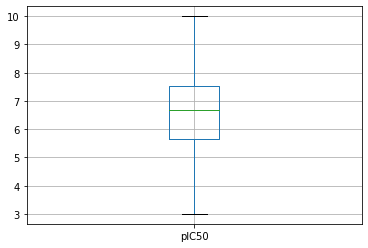

In [326]:
df_full.boxplot(column='pIC50') ## All outliers have been removed 

In [328]:
## Remove rows that are missing a pIC50 value 
df_full.dropna(inplace=True) ## Datset is now without any outliers in the response variable 

bioactivity_class molecule_chembl_id  \
0               active       CHEMBL406146   
1               active        CHEMBL78946   
2               active       CHEMBL324109   
3           min effect       CHEMBL114147   
4           min effect       CHEMBL419949   
...                ...                ...   
9703          inactive      CHEMBL4292235   
9704          inactive      CHEMBL4286556   
9705          inactive      CHEMBL4284235   
9706          inactive      CHEMBL4284580   
9707        min effect      CHEMBL1164540   

                                       canonical_smiles  standard_value  \
0     CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...           413.0   
1     CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...             2.0   
2     CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...           460.0   
3     CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...          9000.0   
4     CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...          5600.0   
...                                                 ...             ...   
9703  Cc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)OCCN(C)C)c...         10000.0   
9704  CN(C)CCOC(=O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=...         10000.0   
9705  Cc1ccc(NC(=O)c2coc3ccc(/C=C/C(=O)OCCN(C)C)cc3c...         10000.0   
9706      O=C(O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=O)c2c1         10000.0   
9707  O=C(O)c1cc(-c2ccc(/C=N/Nc3nc(Nc4ccc(F)cc4)nc(N...          7000.0   

      Molecular Weight  Number of Hydrogen Donors  \
0              999.085                       13.0   
1              893.005                       12.0   
2              751.988                        8.0   
3              737.895                        8.0   
4              828.020                        8.0   
...                ...                        ...   
9703           420.465                        1.0   
9704           406.438                        1.0   
9705           420.465                        1.0   
9706           335.315                        2.0   
9707           537.939                        3.0   

      Number of Hydrogen Acceptors     OWPC     pIC50  
0                             13.0 -1.43550  6.384050  
1                             12.0 -1.73610  8.698970  
2                              9.0  2.35350  6.337242  
3                              8.0  1.96260  5.045757  
4                              8.0  3.57390  5.251812  
...                            ...      ...       ...  
9703                           6.0  3.47172  5.000000  
9704                           6.0  3.16330  5.000000  
9705                           6.0  3.47172  5.000000  
9706                           4.0  3.14310  5.000000  
9707                          10.0  4.64850  5.154902  

[9693 rows x 9 columns]

In [331]:
df_full.drop(columns='standard_value',inplace=True)

In [332]:
df_full

bioactivity_class molecule_chembl_id  \
0               active       CHEMBL406146   
1               active        CHEMBL78946   
2               active       CHEMBL324109   
3           min effect       CHEMBL114147   
4           min effect       CHEMBL419949   
...                ...                ...   
9703          inactive      CHEMBL4292235   
9704          inactive      CHEMBL4286556   
9705          inactive      CHEMBL4284235   
9706          inactive      CHEMBL4284580   
9707        min effect      CHEMBL1164540   

                                       canonical_smiles  Molecular Weight  \
0     CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...           999.085   
1     CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...           893.005   
2     CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...           751.988   
3     CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...           737.895   
4     CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...           828.020   
...                                                 ...               ...   
9703  Cc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)OCCN(C)C)c...           420.465   
9704  CN(C)CCOC(=O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=...           406.438   
9705  Cc1ccc(NC(=O)c2coc3ccc(/C=C/C(=O)OCCN(C)C)cc3c...           420.465   
9706      O=C(O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=O)c2c1           335.315   
9707  O=C(O)c1cc(-c2ccc(/C=N/Nc3nc(Nc4ccc(F)cc4)nc(N...           537.939   

      Number of Hydrogen Donors  Number of Hydrogen Acceptors     OWPC  \
0                          13.0                          13.0 -1.43550   
1                          12.0                          12.0 -1.73610   
2                           8.0                           9.0  2.35350   
3                           8.0                           8.0  1.96260   
4                           8.0                           8.0  3.57390   
...                         ...                           ...      ...   
9703                        1.0                           6.0  3.47172   
9704                        1.0                           6.0  3.16330   
9705                        1.0                           6.0  3.47172   
9706                        2.0                           4.0  3.14310   
9707                        3.0                          10.0  4.64850   

         pIC50  
0     6.384050  
1     8.698970  
2     6.337242  
3     5.045757  
4     5.251812  
...        ...  
9703  5.000000  
9704  5.000000  
9705  5.000000  
9706  5.000000  
9707  5.154902  

[9708 rows x 8 columns]

In [333]:
df_full.to_csv('data-no outliers.csv')

In [2]:
import pandas as pd
df_full = pd.read_csv('data-no outliers.csv')

In [3]:
df_full

Unnamed: 0 bioactivity_class molecule_chembl_id  \
0              0            active       CHEMBL406146   
1              1            active        CHEMBL78946   
2              2            active       CHEMBL324109   
3              3        min effect       CHEMBL114147   
4              4        min effect       CHEMBL419949   
...          ...               ...                ...   
9703        9703          inactive      CHEMBL4292235   
9704        9704          inactive      CHEMBL4286556   
9705        9705          inactive      CHEMBL4284235   
9706        9706          inactive      CHEMBL4284580   
9707        9707        min effect      CHEMBL1164540   

                                       canonical_smiles  Molecular Weight  \
0     CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...           999.085   
1     CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...           893.005   
2     CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...           751.988   
3     CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...           737.895   
4     CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...           828.020   
...                                                 ...               ...   
9703  Cc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)OCCN(C)C)c...           420.465   
9704  CN(C)CCOC(=O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=...           406.438   
9705  Cc1ccc(NC(=O)c2coc3ccc(/C=C/C(=O)OCCN(C)C)cc3c...           420.465   
9706      O=C(O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=O)c2c1           335.315   
9707  O=C(O)c1cc(-c2ccc(/C=N/Nc3nc(Nc4ccc(F)cc4)nc(N...           537.939   

      Number of Hydrogen Donors  Number of Hydrogen Acceptors     OWPC  \
0                          13.0                          13.0 -1.43550   
1                          12.0                          12.0 -1.73610   
2                           8.0                           9.0  2.35350   
3                           8.0                           8.0  1.96260   
4                           8.0                           8.0  3.57390   
...                         ...                           ...      ...   
9703                        1.0                           6.0  3.47172   
9704                        1.0                           6.0  3.16330   
9705                        1.0                           6.0  3.47172   
9706                        2.0                           4.0  3.14310   
9707                        3.0                          10.0  4.64850   

         pIC50  
0     6.384050  
1     8.698970  
2     6.337242  
3     5.045757  
4     5.251812  
...        ...  
9703  5.000000  
9704  5.000000  
9705  5.000000  
9706  5.000000  
9707  5.154902  

[9708 rows x 9 columns]

In [5]:
df_full.dropna(inplace=True)

In [6]:
df_full

Unnamed: 0 bioactivity_class molecule_chembl_id  \
0              0            active       CHEMBL406146   
1              1            active        CHEMBL78946   
2              2            active       CHEMBL324109   
3              3        min effect       CHEMBL114147   
4              4        min effect       CHEMBL419949   
...          ...               ...                ...   
9703        9703          inactive      CHEMBL4292235   
9704        9704          inactive      CHEMBL4286556   
9705        9705          inactive      CHEMBL4284235   
9706        9706          inactive      CHEMBL4284580   
9707        9707        min effect      CHEMBL1164540   

                                       canonical_smiles  Molecular Weight  \
0     CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...           999.085   
1     CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...           893.005   
2     CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...           751.988   
3     CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...           737.895   
4     CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...           828.020   
...                                                 ...               ...   
9703  Cc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)OCCN(C)C)c...           420.465   
9704  CN(C)CCOC(=O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=...           406.438   
9705  Cc1ccc(NC(=O)c2coc3ccc(/C=C/C(=O)OCCN(C)C)cc3c...           420.465   
9706      O=C(O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=O)c2c1           335.315   
9707  O=C(O)c1cc(-c2ccc(/C=N/Nc3nc(Nc4ccc(F)cc4)nc(N...           537.939   

      Number of Hydrogen Donors  Number of Hydrogen Acceptors     OWPC  \
0                          13.0                          13.0 -1.43550   
1                          12.0                          12.0 -1.73610   
2                           8.0                           9.0  2.35350   
3                           8.0                           8.0  1.96260   
4                           8.0                           8.0  3.57390   
...                         ...                           ...      ...   
9703                        1.0                           6.0  3.47172   
9704                        1.0                           6.0  3.16330   
9705                        1.0                           6.0  3.47172   
9706                        2.0                           4.0  3.14310   
9707                        3.0                          10.0  4.64850   

         pIC50  
0     6.384050  
1     8.698970  
2     6.337242  
3     5.045757  
4     5.251812  
...        ...  
9703  5.000000  
9704  5.000000  
9705  5.000000  
9706  5.000000  
9707  5.154902  

[9693 rows x 9 columns]

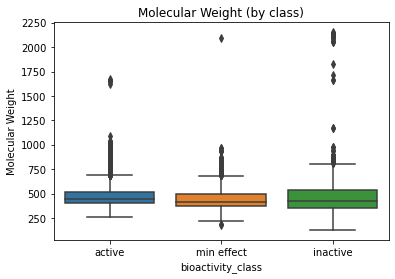

In [10]:
## Obtain the graphs of descriptors to show differences between class (active, inactive, min Effect)
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='bioactivity_class', y='Molecular Weight', data=df_full)
plt.title('Molecular Weight (by class)')
plt.savefig('Molecular Weight Dist.png')

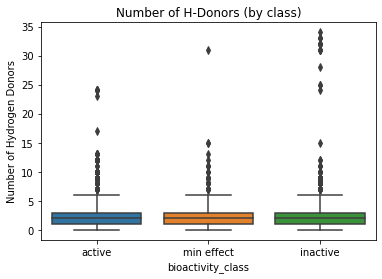

In [11]:
sns.boxplot(x='bioactivity_class', y='Number of Hydrogen Donors', data=df_full)
plt.title('Number of H-Donors (by class)')
plt.savefig('Number of H-Donors Dist.png')

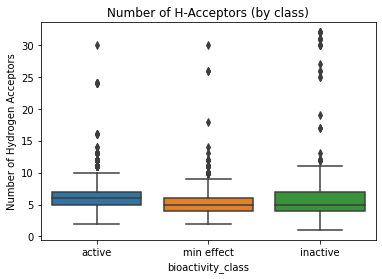

In [12]:
sns.boxplot(x='bioactivity_class', y='Number of Hydrogen Acceptors', data=df_full)
plt.title('Number of H-Acceptors (by class)')
plt.savefig('Number of H-Acceptors.png')

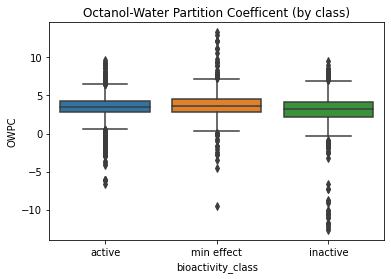

In [13]:
sns.boxplot(x='bioactivity_class', y='OWPC', data=df_full)
plt.title('Octanol-Water Partition Coefficent (by class)')
plt.savefig('octanol-water partition coefficent.png')

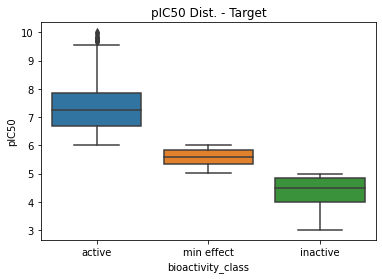

In [15]:
sns.boxplot(x='bioactivity_class', y='pIC50', data=df_full)
plt.title('pIC50 Dist. - Target')
plt.savefig('pIC50 class pic ')

In [ ]:
## Remove compounds that violates more than one of the Lipinki's Rule of 5:
## . Molecular Weight < 500 daltons
## . Octonal water partition coefficent (logP) < 5
## . Number of hydrogen bond donor < 5
## . Number of Hydrogen bond acceptors < 10

In [47]:
def lipinski_checker(data):
          
    num_hdonors = data['Number of Hydrogen Donors']
    num_hacceptors = data['Number of Hydrogen Acceptors']
    mol_weight = data['Molecular Weight']
    mol_logp = data['OWPC']
    
    result = []
    
    if num_hdonors > 5:
        result.append(1)
    else:
        result.append(0)
        
    if num_hacceptors > 10:
        result.append(1)
    else:
        result.append(0)
        
    if mol_weight >= 500:
        result.append(1)
    else:
        result.append(0)
        
    if mol_logp >= 5:
        result.append(1)
    else:
        result.append(0)
    
    return result
    
def lipinski_pass(compounds):
    checked_df = {'HD':[], 'HA':[], 'logP':[], 'MW':[]}
    numTrials = len(compounds)
    for x in range(numTrials):
        result = lipinski_checker(compounds.iloc[x])
        checked_df['HD'].append(result[0])
        checked_df['HA'].append(result[1])
        checked_df['logP'].append(result[2])
        checked_df['MW'].append(result[3])
    return checked_df

In [48]:
checked_df = lipinski_pass(df_full)

In [52]:
checked_df = pd.DataFrame(checked_df)

In [53]:
checked_df

HD  HA  logP  MW
0      1   1     1   0
1      1   1     1   0
2      1   0     1   0
3      1   0     1   0
4      1   0     1   0
...   ..  ..   ...  ..
9688   0   0     0   0
9689   0   0     0   0
9690   0   0     0   0
9691   0   0     0   0
9692   0   0     1   0

[9693 rows x 4 columns]

In [54]:
checked_df['sum'] = checked_df.sum(axis=1)

In [55]:
checked_df

HD  HA  logP  MW  sum
0      1   1     1   0    3
1      1   1     1   0    3
2      1   0     1   0    2
3      1   0     1   0    2
4      1   0     1   0    2
...   ..  ..   ...  ..  ...
9688   0   0     0   0    0
9689   0   0     0   0    0
9690   0   0     0   0    0
9691   0   0     0   0    0
9692   0   0     1   0    1

[9693 rows x 5 columns]

In [57]:
checked_df = checked_df.loc[checked_df['sum'] <= 1]

In [66]:
checked_df

HD  HA  logP  MW  sum
12     0   0     0   1    1
18     0   0     1   0    1
21     0   0     1   0    1
24     0   0     1   0    1
133    0   0     1   0    1
...   ..  ..   ...  ..  ...
9688   0   0     0   0    0
9689   0   0     0   0    0
9690   0   0     0   0    0
9691   0   0     0   0    0
9692   0   0     1   0    1

[8598 rows x 5 columns]

In [79]:
df_full

bioactivity_class molecule_chembl_id  \
0               active       CHEMBL406146   
1               active        CHEMBL78946   
2               active       CHEMBL324109   
3           min effect       CHEMBL114147   
4           min effect       CHEMBL419949   
...                ...                ...   
9703          inactive      CHEMBL4292235   
9704          inactive      CHEMBL4286556   
9705          inactive      CHEMBL4284235   
9706          inactive      CHEMBL4284580   
9707        min effect      CHEMBL1164540   

                                       canonical_smiles  Molecular Weight  \
0     CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...           999.085   
1     CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...           893.005   
2     CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...           751.988   
3     CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...           737.895   
4     CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...           828.020   
...                                                 ...               ...   
9703  Cc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)OCCN(C)C)c...           420.465   
9704  CN(C)CCOC(=O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=...           406.438   
9705  Cc1ccc(NC(=O)c2coc3ccc(/C=C/C(=O)OCCN(C)C)cc3c...           420.465   
9706      O=C(O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=O)c2c1           335.315   
9707  O=C(O)c1cc(-c2ccc(/C=N/Nc3nc(Nc4ccc(F)cc4)nc(N...           537.939   

      Number of Hydrogen Donors  Number of Hydrogen Acceptors     OWPC  \
0                          13.0                          13.0 -1.43550   
1                          12.0                          12.0 -1.73610   
2                           8.0                           9.0  2.35350   
3                           8.0                           8.0  1.96260   
4                           8.0                           8.0  3.57390   
...                         ...                           ...      ...   
9703                        1.0                           6.0  3.47172   
9704                        1.0                           6.0  3.16330   
9705                        1.0                           6.0  3.47172   
9706                        2.0                           4.0  3.14310   
9707                        3.0                          10.0  4.64850   

         pIC50  
0     6.384050  
1     8.698970  
2     6.337242  
3     5.045757  
4     5.251812  
...        ...  
9703  5.000000  
9704  5.000000  
9705  5.000000  
9706  5.000000  
9707  5.154902  

[9693 rows x 8 columns]

In [81]:
df_full

bioactivity_class molecule_chembl_id  \
0               active       CHEMBL406146   
1               active        CHEMBL78946   
2               active       CHEMBL324109   
3           min effect       CHEMBL114147   
4           min effect       CHEMBL419949   
...                ...                ...   
9703          inactive      CHEMBL4292235   
9704          inactive      CHEMBL4286556   
9705          inactive      CHEMBL4284235   
9706          inactive      CHEMBL4284580   
9707        min effect      CHEMBL1164540   

                                       canonical_smiles  Molecular Weight  \
0     CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...           999.085   
1     CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...           893.005   
2     CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...           751.988   
3     CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...           737.895   
4     CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...           828.020   
...                                                 ...               ...   
9703  Cc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)OCCN(C)C)c...           420.465   
9704  CN(C)CCOC(=O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=...           406.438   
9705  Cc1ccc(NC(=O)c2coc3ccc(/C=C/C(=O)OCCN(C)C)cc3c...           420.465   
9706      O=C(O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=O)c2c1           335.315   
9707  O=C(O)c1cc(-c2ccc(/C=N/Nc3nc(Nc4ccc(F)cc4)nc(N...           537.939   

      Number of Hydrogen Donors  Number of Hydrogen Acceptors     OWPC  \
0                          13.0                          13.0 -1.43550   
1                          12.0                          12.0 -1.73610   
2                           8.0                           9.0  2.35350   
3                           8.0                           8.0  1.96260   
4                           8.0                           8.0  3.57390   
...                         ...                           ...      ...   
9703                        1.0                           6.0  3.47172   
9704                        1.0                           6.0  3.16330   
9705                        1.0                           6.0  3.47172   
9706                        2.0                           4.0  3.14310   
9707                        3.0                          10.0  4.64850   

         pIC50   lit  
0     6.384050     0  
1     8.698970     1  
2     6.337242     2  
3     5.045757     3  
4     5.251812     4  
...        ...   ...  
9703  5.000000  9703  
9704  5.000000  9704  
9705  5.000000  9705  
9706  5.000000  9706  
9707  5.154902  9707  

[9693 rows x 9 columns]

In [84]:
checked_df

HD  HA  logP  MW  sum   lit
12     0   0     0   1    1    12
18     0   0     1   0    1    18
21     0   0     1   0    1    21
24     0   0     1   0    1    24
133    0   0     1   0    1   133
...   ..  ..   ...  ..  ...   ...
9688   0   0     0   0    0  9688
9689   0   0     0   0    0  9689
9690   0   0     0   0    0  9690
9691   0   0     0   0    0  9691
9692   0   0     1   0    1  9692

[8598 rows x 6 columns]

In [86]:
checked_df = pd.merge(checked_df,df_full, on='lit')

In [87]:
checked_df

HD  HA  logP  MW  sum   lit bioactivity_class molecule_chembl_id  \
0      0   0     0   1    1    12            active       CHEMBL142715   
1      0   0     1   0    1    18            active       CHEMBL143687   
2      0   0     1   0    1    21        min effect        CHEMBL82270   
3      0   0     1   0    1    24        min effect        CHEMBL84835   
4      0   0     1   0    1   133            active       CHEMBL296166   
...   ..  ..   ...  ..  ...   ...               ...                ...   
8578   0   0     0   0    0  9688            active      CHEMBL4291981   
8579   0   0     0   0    0  9689            active      CHEMBL4284110   
8580   0   0     0   0    0  9690            active      CHEMBL4276834   
8581   0   0     0   0    0  9691            active      CHEMBL4287483   
8582   0   0     1   0    1  9692            active      CHEMBL4282964   

                                       canonical_smiles  Molecular Weight  \
0     c1ccc(-c2ccc(COc3ccc4c(c3)CCC(CCN3CCCCC3)C4)cc...           425.616   
1     COC(=O)c1cc(NC(=O)[C@@H](NC(=O)C[C@H](O)[C@H](...           745.776   
2     CC(C)[C@H](F)C(=O)N[C@@H](C)C(=O)N[C@@H](Cc1cc...           599.748   
3     CC(C)CC(=O)N[C@@H](C)C(=O)N[C@@H](Cc1ccccc1)[C...           581.758   
4     COC(=O)[C@@H]1CC(NC(=O)[C@H](NC(=O)C[C@H](O)[C...           751.824   
...                                                 ...               ...   
8578  NC1=N[C@@]2(CO1)c1cc(NC(=O)c3ccc(Cl)cn3)ccc1Oc...           442.262   
8579  CC#Cc1cncc(-c2ccc3c(c2)[C@@]2(COC(N)=N2)c2cc(C...           450.498   
8580  CC#Cc1cncc(-c2ccc3c(c2)[C@@]2(COC(N)=N2)c2cc(C...           450.498   
8581  CC#Cc1cncc(-c2ccc3c(c2)[C@@]2(COC(N)=N2)c2cc(-...           463.472   
8582  NC1=N[C@@]2(CO1)c1cc(-c3cncc(C#CC4CC4)c3)ccc1O...           476.536   

      Number of Hydrogen Donors  Number of Hydrogen Acceptors    OWPC  \
0                           0.0                           2.0  6.9135   
1                           5.0                           9.0  4.4964   
2                           5.0                           6.0  2.4520   
3                           5.0                           6.0  2.5040   
4                           5.0                           9.0  3.5316   
...                         ...                           ...     ...   
8578                        2.0                           7.0  3.7299   
8579                        1.0                           7.0  4.0129   
8580                        1.0                           7.0  4.0129   
8581                        1.0                           7.0  4.4103   
8582                        1.0                           7.0  4.4030   

         pIC50  
0     6.455932  
1     6.920819  
2     5.946922  
3     5.759451  
4     6.920819  
...        ...  
8578  6.721246  
8579  8.920819  
8580  8.657577  
8581  8.387216  
8582  7.060481  

[8583 rows x 14 columns]

Text(0.5, 1.0, 'pIC50 Dist. - Target')

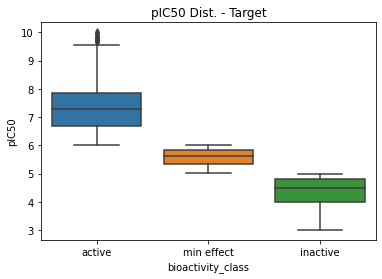

In [88]:
sns.boxplot(x='bioactivity_class', y='pIC50', data=checked_df)
plt.title('pIC50 Dist. - Target (valid candidates)')
plt.savefig('pIC50 class pic (pass Lipinski) ')

In [100]:
valid_compounds_classification = checked_df[checked_df.bioactivity_class != 'min effect']

In [101]:
valid_compounds_classification.to_csv('df_ready_classification.csv')

In [104]:
checked_df.to_csv('df-ready-regression.csv')

In [1]:
### Now data is prepared for feature engineering: obtaining 1D/2D descriptors for compound library. 
import pandas as pd
data_1 = pd.read_csv('df-ready-regression.csv')
data_2 = pd.read_csv('df_ready_classification.csv')

In [7]:
selections = ['canonical_smiles', 'molecule_chembl_id']
df_reg = data_1[selections]
df_class = data_2[selections]

In [8]:
df_reg.to_csv('Padel_regression_ready.smi', sep='\t', index=False, header=False)

In [9]:
data_1

Unnamed: 0  HD  HA  logP  MW  sum bioactivity_class molecule_chembl_id  \
0              0   0   0     0   1    1            active       CHEMBL142715   
1              1   0   0     1   0    1            active       CHEMBL143687   
2              2   0   0     1   0    1        min effect        CHEMBL82270   
3              3   0   0     1   0    1        min effect        CHEMBL84835   
4              4   0   0     1   0    1            active       CHEMBL296166   
...          ...  ..  ..   ...  ..  ...               ...                ...   
8578        8578   0   0     0   0    0            active      CHEMBL4291981   
8579        8579   0   0     0   0    0            active      CHEMBL4284110   
8580        8580   0   0     0   0    0            active      CHEMBL4276834   
8581        8581   0   0     0   0    0            active      CHEMBL4287483   
8582        8582   0   0     1   0    1            active      CHEMBL4282964   

                                       canonical_smiles  Molecular Weight  \
0     c1ccc(-c2ccc(COc3ccc4c(c3)CCC(CCN3CCCCC3)C4)cc...           425.616   
1     COC(=O)c1cc(NC(=O)[C@@H](NC(=O)C[C@H](O)[C@H](...           745.776   
2     CC(C)[C@H](F)C(=O)N[C@@H](C)C(=O)N[C@@H](Cc1cc...           599.748   
3     CC(C)CC(=O)N[C@@H](C)C(=O)N[C@@H](Cc1ccccc1)[C...           581.758   
4     COC(=O)[C@@H]1CC(NC(=O)[C@H](NC(=O)C[C@H](O)[C...           751.824   
...                                                 ...               ...   
8578  NC1=N[C@@]2(CO1)c1cc(NC(=O)c3ccc(Cl)cn3)ccc1Oc...           442.262   
8579  CC#Cc1cncc(-c2ccc3c(c2)[C@@]2(COC(N)=N2)c2cc(C...           450.498   
8580  CC#Cc1cncc(-c2ccc3c(c2)[C@@]2(COC(N)=N2)c2cc(C...           450.498   
8581  CC#Cc1cncc(-c2ccc3c(c2)[C@@]2(COC(N)=N2)c2cc(-...           463.472   
8582  NC1=N[C@@]2(CO1)c1cc(-c3cncc(C#CC4CC4)c3)ccc1O...           476.536   

      Number of Hydrogen Donors  Number of Hydrogen Acceptors    OWPC  \
0                           0.0                           2.0  6.9135   
1                           5.0                           9.0  4.4964   
2                           5.0                           6.0  2.4520   
3                           5.0                           6.0  2.5040   
4                           5.0                           9.0  3.5316   
...                         ...                           ...     ...   
8578                        2.0                           7.0  3.7299   
8579                        1.0                           7.0  4.0129   
8580                        1.0                           7.0  4.0129   
8581                        1.0                           7.0  4.4103   
8582                        1.0                           7.0  4.4030   

         pIC50  
0     6.455932  
1     6.920819  
2     5.946922  
3     5.759451  
4     6.920819  
...        ...  
8578  6.721246  
8579  8.920819  
8580  8.657577  
8581  8.387216  
8582  7.060481  

[8583 rows x 14 columns]

In [10]:
df_class.to_csv('Padel_classification_ready.smi', sep='\t', index=False, header=False)

In [11]:
data_2

Unnamed: 0  HD  HA  logP  MW  sum bioactivity_class molecule_chembl_id  \
0              0   0   0     0   1    1            active       CHEMBL142715   
1              1   0   0     1   0    1            active       CHEMBL143687   
2              4   0   0     1   0    1            active       CHEMBL296166   
3              5   0   0     1   0    1          inactive       CHEMBL296166   
4              6   0   0     1   0    1          inactive        CHEMBL53668   
...          ...  ..  ..   ...  ..  ...               ...                ...   
6874        8578   0   0     0   0    0            active      CHEMBL4291981   
6875        8579   0   0     0   0    0            active      CHEMBL4284110   
6876        8580   0   0     0   0    0            active      CHEMBL4276834   
6877        8581   0   0     0   0    0            active      CHEMBL4287483   
6878        8582   0   0     1   0    1            active      CHEMBL4282964   

                                       canonical_smiles  Molecular Weight  \
0     c1ccc(-c2ccc(COc3ccc4c(c3)CCC(CCN3CCCCC3)C4)cc...           425.616   
1     COC(=O)c1cc(NC(=O)[C@@H](NC(=O)C[C@H](O)[C@H](...           745.776   
2     COC(=O)[C@@H]1CC(NC(=O)[C@H](NC(=O)C[C@H](O)[C...           751.824   
3     COC(=O)[C@@H]1CC(NC(=O)[C@H](NC(=O)C[C@H](O)[C...           751.824   
4     COC(=O)[C@@H]1CC(NC(=O)[C@@H](NC(=O)C[C@H](O)[...           655.789   
...                                                 ...               ...   
6874  NC1=N[C@@]2(CO1)c1cc(NC(=O)c3ccc(Cl)cn3)ccc1Oc...           442.262   
6875  CC#Cc1cncc(-c2ccc3c(c2)[C@@]2(COC(N)=N2)c2cc(C...           450.498   
6876  CC#Cc1cncc(-c2ccc3c(c2)[C@@]2(COC(N)=N2)c2cc(C...           450.498   
6877  CC#Cc1cncc(-c2ccc3c(c2)[C@@]2(COC(N)=N2)c2cc(-...           463.472   
6878  NC1=N[C@@]2(CO1)c1cc(-c3cncc(C#CC4CC4)c3)ccc1O...           476.536   

      Number of Hydrogen Donors  Number of Hydrogen Acceptors    OWPC  \
0                             0                             2  6.9135   
1                             5                             9  4.4964   
2                             5                             9  3.5316   
3                             5                             9  3.5316   
4                             5                             9  2.5430   
...                         ...                           ...     ...   
6874                          2                             7  3.7299   
6875                          1                             7  4.0129   
6876                          1                             7  4.0129   
6877                          1                             7  4.4103   
6878                          1                             7  4.4030   

         pIC50  
0     6.455932  
1     6.920819  
2     6.920819  
3     5.000000  
4     3.853872  
...        ...  
6874  6.721246  
6875  8.920819  
6876  8.657577  
6877  8.387216  
6878  7.060481  

[6879 rows x 14 columns]